In [20]:
using Clapeyron
using Plots
using CSV
using DataFrames
using LaTeXStrings
import Pkg; Pkg.add("Measures")
using Measures

    Updating registry at `C:\Users\gk321\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\gk321\OneDrive - Imperial College London\Documents\4th year\Research Project\Project.toml`
  No Changes to `C:\Users\gk321\OneDrive - Imperial College London\Documents\4th year\Research Project\Manifest.toml`


Model

In [82]:
model_mix = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1]),("Water",["H2O"=>1]),("Carbon Dioxide",["CO2"=>1]),("Sulphur Dioxide",["SO2"=>1])];

        userlocations = (Mw = [16.02285, 14.02658, 31.03392, 18.01528, 44.01, 64.066],

        epsilon = [284.78 348.39 528.21 339.89 134.58 259.90;

                   348.39 473.39 423.17 423.63 276.45 301.96;

                   528.21 423.17 407.22 358.02 312.3 302.89;

                   339.89 423.63 358.02 266.68 226.38 239.53;
                   
                   134.58 276.45 312.3 226.38 207.89 233.15;
                   
                   259.90 301.96 302.89 239.53 233.15 237.54],

        sigma = [3.2477, 4.8801, 3.4054, 3.0063, 3.05, 3.1605],

        lambda_a = [6, 6, 6, 6, 5.055, 6],

        lambda_r = [10.354 14.063 52.305 13.085 50.06 12.412;

                    14.063 19.871 21.230 100.00 22.873 17.354;

                    52.305 21.230 22.699 19.619 24.474 18.511;

                    13.085 100.00 19.619 17.020 21.116 16.085;
            
                    50.06  22.873 24.474 21.116 26.408 19.908;
            
                    12.412 17.354 18.511 16.085 19.908 15.213],

        vst = [1, 1, 2, 1, 2, 3],

        S = [0.79675, 0.22932, 0.58538, 1, 0.84680, 0.62547],

        n_H=[2, 0, 1, 2, 0, 1],

        n_e=[1, 0, 2, 2, 0, 1],

        n_a1=[0, 0, 0, 0, 1, 0],

        n_a=[0, 0, 0, 1, 0, 1],

        n_a2=[0, 0, 0, 0, 1, 0],

        n_ae=[0, 0, 0, 1, 0, 1],

        epsilon_assoc = Dict([(("NH2","H"),("NH2","e")) => 1070.80,

                              (("NH2","H"),("CH2OH","e")) => 629.88,

                              (("NH2","H"),("H2O","e")) => 1364.40,

                              (("NH2","H"),("SO2","e")) => 1011.60,

                              (("CH2OH","H"),("NH2","e")) => 2403.78,

                              (("CH2OH","H"),("CH2OH","e")) => 2097.90,

                              (("CH2OH","H"),("H2O","e")) => 600.00,

                              (("CH2OH","H"),("SO2","e")) => 1415.90,

                              (("H2O","H"),("NH2","e")) => 1877.50,

                              (("H2O","H"),("CH2OH","e")) => 2000.6,

                              (("H2O","H"),("H2O","e")) => 1985.40,

                              (("H2O","H"),("SO2","e")) => 1343.90,

                              (("SO2","H"),("NH2","e")) => 1011.60,

                              (("SO2","H"),("CH2OH","e")) => 1415.90,

                              (("SO2","H"),("H2O","e")) => 1343.90,

                              (("SO2","H"),("SO2","e")) => 955.58,

                              (("SO2","a"),("H2O","ae")) => 671.95,

                              (("H2O","a"),("SO2","ae")) => 671.95,

                              (("CO2","a1"),("NH2","e")) => 3313,
                
                              (("CO2","a1"),("H2O","e")) => 1398.1,
                 
                              (("CO2","a2"),("NH2","e")) => 4943.6]),
                
                              
        

        bondvol = Dict([(("NH2","H"),("NH2","e")) => 95.225e-30,

                              (("NH2","H"),("CH2OH","e")) => 346.08e-30,

                              (("NH2","H"),("H2O","e")) => 22.450e-30,

                              (("NH2","H"),("SO2","e")) => 345.890e-30,

                              (("CH2OH","H"),("NH2","e")) => 26.192e-30,

                              (("CH2OH","H"),("CH2OH","e")) => 62.309e-30,

                              (("CH2OH","H"),("H2O","e")) => 490.19e-30,

                              (("CH2OH","H"),("SO2","e")) => 303.270e-30,

                              (("H2O","H"),("NH2","e")) => 459.18e-30,

                              (("H2O","H"),("CH2OH","e")) => 130.02e-30,

                              (("H2O","H"),("H2O","e")) => 101.69e-30,

                              (("H2O","H"),("SO2","e")) => 353.41e-30,

                              (("SO2","H"),("NH2","e")) => 345.890e-30,
                
                              (("SO2","H"),("CH2OH","e")) => 303.270e-30,
                
                              (("SO2","H"),("H2O","e")) => 353.41e-30,
                
                              (("SO2","H"),("SO2","e")) => 849.99e-30,

                              (("SO2","a"),("H2O","ae")) => 91.419e-30,

                              (("H2O","a"),("SO2","ae")) => 91.419e-30,


                              (("CO2","a1"),("NH2","e")) => 3280.3e-30,
                
                              (("CO2","a1"),("H2O","e")) => 91.419e-30,
                 
                              (("CO2","a2"),("NH2","e")) => 142.64e-30])));
                
                            

Make vetor of SO2 loading in the liquid

In [101]:
sulphload = [0, 0.01, 0.1, 0.2]
Nsulph = length(sulphload)


4

Set MEA-H2O ratio in liquid

In [104]:
wt_MEA = 0.3
wt_H2O = 1-wt_MEA

mw_MEA = 61.08
mw_H2O = 18.01528

x_MEA = (wt_MEA/mw_MEA)*(1/((wt_MEA/mw_MEA)+(wt_H2O/mw_H2O)))
x_H2O = 1-x_MEA
solvrat = x_H2O/x_MEA

7.911062165006595

Re-calculate compositions subject to CO2 loading

In [107]:
load = LinRange(0, 1.2, 100) #these are the ratio of CO2 mols to MEA mols in solution

N = length(load)

# intialise new composition vectors
MEAsol = zeros(N, Nsulph)
H2Osol = zeros(N, Nsulph)
CO2sol = zeros(N, Nsulph)
SO2sol = zeros(N, Nsulph)
Ncomp = Nsulph*4
z = zeros(N, Ncomp)

# calculate the new liquid compositions at these loadings

for j in 1:Nsulph
MEAsol[:,j] = 1 ./ (1 .+ load .+ solvrat .+ sulphload[j])
CO2sol[:,j] = MEAsol[:,j] .* load
SO2sol[:,j] = MEAsol[:,j] .* sulphload[j]       
H2Osol[:,j] = 1 .- MEAsol[:,j] .- CO2sol[:,j] .- SO2sol[:,j]
ind = 1 + (4 * (j-1) )
z[:, ind] = MEAsol[:,j]
z[:, ind+1] = H2Osol[:,j]
z[:, ind+2] = CO2sol[:,j]
z[:, ind+3] = SO2sol[:,j]
end

#z should be in the order MEA, H20, CO2 and then SO2 composition
z


100×16 Matrix{Float64}:
 0.11222    0.88778   0.0         0.0  …  0.868292  0.0         0.0219513
 0.112068   0.886574  0.0013584   0.0     0.867138  0.00132862  0.0219222
 0.111916   0.885371  0.00271311  0.0     0.865988  0.00265371  0.0218931
 0.111764   0.884172  0.00406415  0.0     0.86484   0.00397529  0.0218641
 0.111613   0.882976  0.00541153  0.0     0.863696  0.00529337  0.0218351
 0.111462   0.881783  0.00675527  0.0  …  0.862554  0.00660796  0.0218063
 0.111312   0.880593  0.00809539  0.0     0.861416  0.00791909  0.0217775
 0.111162   0.879406  0.0094319   0.0     0.86028   0.00922676  0.0217488
 0.111012   0.878223  0.0107648   0.0     0.859148  0.010531    0.0217202
 0.110863   0.877043  0.0120941   0.0     0.858019  0.0118318   0.0216916
 0.110714   0.875866  0.0134199   0.0  …  0.856892  0.0131292   0.0216631
 0.110566   0.874692  0.0147421   0.0     0.855768  0.0144232   0.0216347
 0.110418   0.873522  0.0160608   0.0     0.854648  0.0157137   0.0216064
 ⋮            

Calculate Vapour Phase data

In [110]:
T = 298.15
pvap = zeros(N, Nsulph)
y = zeros(N, Ncomp)
partial = zeros(N, 2 * Nsulph )

for k in 1:Nsulph

ind = 1 + (4 * (k-1) )
    
    for h in 1:N
        x_bub = z[h, ind:ind+3]
        calc = bubble_pressure(model_mix, T, x_bub)
        pvap[h, k] = calc[1]
        y[h, ind] = calc[4][1]
        y[h, ind+1] = calc[4][2]
        y[h, ind+2] = calc[4][3]
        y[h, ind+3] = calc[4][4]
    end

end

for k in 1:Nsulph
    ind = 1 + (4 * (k-1) )
    ind2 = 1 + (2 * (k-1) )
    partial[:, ind2] = pvap[:, k] .* y[:, ind+2]
    partial[:, ind2 + 1] = pvap[:, k] .* y[:, ind+3]
end


partialfil = partial[2:N, :]
loadfil = load[2:N]
partial

#odd columns are CO2 vap press, even ones are SO2 vap pressure

100×8 Matrix{Float64}:
 0.0        0.0  0.0        2111.33  0.0        20316.9  0.0        38936.7
 0.0936628  0.0  0.0930895  2092.39  0.0872499  20141.3  0.0813184  38613.1
 0.197486   0.0  0.196283   2073.71  0.184027   19968.0  0.171569   38293.6
 0.312712   0.0  0.310816   2055.28  0.291496   19796.9  0.271846   37978.0
 0.440763   0.0  0.438103   2037.09  0.410995   19627.9  0.383405   37666.3
 0.583275   0.0  0.579771   2019.15  0.544059   19461.2  0.507689   37358.5
 0.742134   0.0  0.737696   2001.44  0.692462   19296.6  0.646363   37054.5
 0.919527   0.0  0.914054   1983.97  0.858256   19134.0  0.801354   36754.1
 1.11799    0.0  1.11137    1966.72  1.04383    18973.5  0.974905   36457.4
 1.34049    0.0  1.33258    1949.69  1.25196    18815.1  1.16963    36164.3
 1.5905     0.0  1.58116    1932.89  1.48591    18658.6  1.3886     35874.7
 1.87209    0.0  1.86115    1916.3   1.74953    18504.0  1.63541    35588.6
 2.1901     0.0  2.17736    1899.93  2.04734    18351.4  1.91433 

Plot the results

In [121]:
plt = plot(grid = :off, 
      framestyle = :box, 
      foreground_color_legend = nothing, 
      legend_font = font(12),
      xtickfont = font(12),
      ytickfont = font(12),
      #yaxis = :log,
      xlims = (0, 1.2),
      legend =:topleft,
      left_margin = 4mm,
      right_margin = 4mm,
      xguidefontsize=16,
      yguidefontsize=16)

plot!(plt, loadfil, partialfil[:,1], 
      color = "indianred2", 
      line = (:path, 3), 
      label = "No SO2 Loading")

plot!(plt, loadfil, partialfil[:, 3], 
      color = "springgreen4", 
      line = (:path, 3), 
      label = "0.01 SO2 Loading")

plot!(plt, loadfil, partialfil[:, 5], 
      color = "deepskyblue1", 
      line = (:path, 3), 
      label = "0.1 SO2 Loading")

plot!(plt, loadfil, partialfil[:, 7], 
      color = "mediumorchid2", 
      line = (:path, 3), 
      label = "0.2 SO2 Loading")



xlabel!(plt, "θ"*L"\mathrm{_{CO_2}}")
ylabel!(plt, "P"*L"\mathrm{_{CO_2}}"*" / Pa")

savefig(plt, "SO2_Loading_Effect_CO2_298")

"C:\\Users\\gk321\\OneDrive - Imperial College London\\Documents\\4th year\\Research Project\\Working Julia\\SO2_Loading_Effect_CO2_298.png"

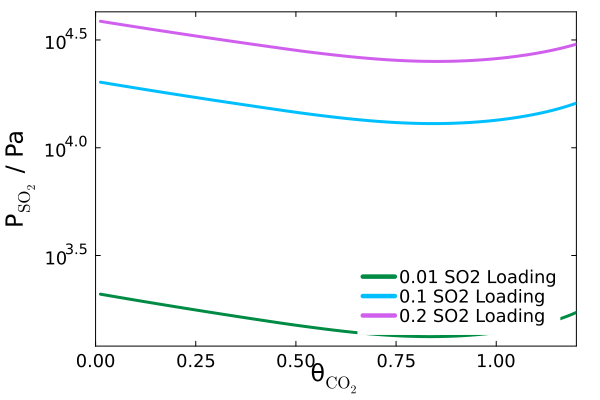

In [119]:
plt = plot(grid = :off, 
      framestyle = :box, 
      foreground_color_legend = nothing, 
      legend_font = font(12),
      xtickfont = font(12),
      ytickfont = font(12),
      yaxis = :log,
      xlims = (0, 1.2),
      legend =:bottomright,
      left_margin = 4mm,
      right_margin = 4mm,
      xguidefontsize=16,
      yguidefontsize=16)

#plot!(plt, loadfil, partialfil[:,2], 
      #color = "indianred2", 
      #line = (:path, 3), 
      #label = "No SO2")

plot!(plt, loadfil, partialfil[:, 4], 
      color = "springgreen4", 
      line = (:path, 3), 
      label = "0.01 SO2 Loading")

plot!(plt, loadfil, partialfil[:, 6], 
      color = "deepskyblue1", 
      line = (:path, 3), 
      label = "0.1 SO2 Loading")

plot!(plt, loadfil, partialfil[:, 8], 
      color = "mediumorchid2", 
      line = (:path, 3), 
      label = "0.2 SO2 Loading")



xlabel!(plt, "θ"*L"\mathrm{_{CO_2}}")
ylabel!(plt, "P"*L"\mathrm{_{SO_2}}"*" / Pa")

#savefig(plt, "SO2_All_Temps_Loading_298")